# Importing the libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [5]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [ ]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Reshape data for SVR 

In [6]:
y = y.reshape(len(y), 1)

- Why I need to do this step, because StandardScaler only accepts 2-dimensional array, but the original y is just a 1-dimensional array, so you need to convert it.

---

- **``reshape(rows, columns)``** is a method in NumPy that changes the shape (dimensions) of an array without altering its data.



In [ ]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_Y.fit_transform(y)

## Why Use Two Separate StandardScaler Objects?

The short answer: You use two separate StandardScaler objects because X and y are different variables with different distributions, and scaling them together with one scaler would mix their statistics (mean and standard deviation), leading to incorrect scaling.

### Different Ranges and Distributions

- **X (Level)**: Values range from 1 to 10
    - This is a small range, and the values are fairly evenly spaced (1, 2, 3, ..., 10)
    
- **y (Salary)**: Values range from 45,000 to 1,000,000
    - This is a massive range, and the values grow exponentially (e.g., salaries jump from 45,000 to 200,000 to 1,000,000)

### How StandardScaler Works

StandardScaler standardizes data by:
1. Subtracting the mean (average value) of the data
2. Dividing by the standard deviation 

### An example in this case
- The mean of X (1 to 10) might be around 5.5, with a small standard deviation.
- The mean of y (45,000 to 10,000,000) might be around 1,000,000, with a huge standard deviation.

In [ ]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Training the SVR model on the whole dataset

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X,y)

/media/thdong07/Private/UDEMY/Machine Learning/venv/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Explain about the abonve code


**kernel** is a function that

- can either learn linear relationships (**linear kernel**)
- or learn non-linear relationships (**non-linear kernel**)

--- 

``rbf``: Radial basis function

# Predicting a new result

In [11]:
sc_Y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

### Explain about the above code
- **``inverse_transform()``**: Scale back the data to the original scale
    - Example: Assume the original scale is $75000 and the scaled version is 0.75. This function will convert 0.75 to $75000
    
- **``transform()``**: Convert original scale to the scaled version
    - Example: Reverse version of **``inverse_transform()``**

- **``reshape(-1,1)``**: Changes the shape (structure) of the data into a 2D array with automatic row count and 1 column.
    - The `-1` tells NumPy to automatically calculate the number of rows based on the length of the array
    - Example: [0.75, 0.85] -> [[0.75], [0.85]]
    - This is particularly important when using scikit-learn functions that require 2D arrays (like StandardScaler)



# Visualising the SVR results

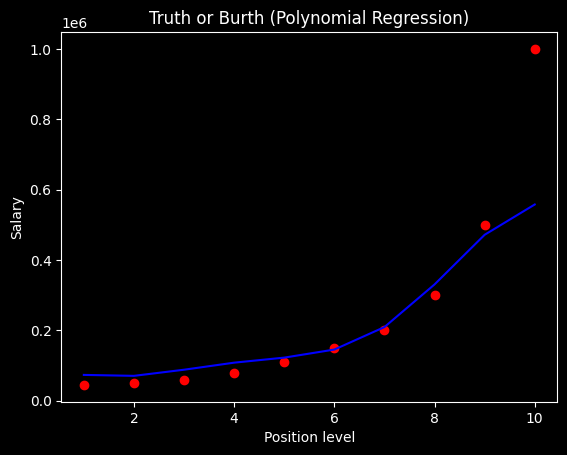

In [13]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y), color="red")
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X).reshape(-1, 1)), color="blue")
plt.title("Truth or Burth (Polynomial Regression)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


# Visualising the SVR results (for higher resolution and smoother curve)

/tmp/ipykernel_37262/180207833.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


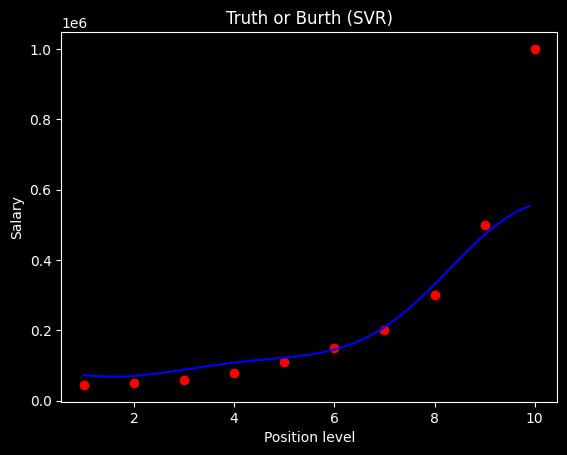

In [ ]:
# Create an array with more elements to connect the dots
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
# Convert X_grid to 2D array
X_grid = X_grid.reshape(len(X_grid), 1)
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(y), color="red")
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1, 1)), color="blue")
plt.title("Truth or Burth (SVR)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

- **``np.arange()``**: creates an array of evenly spaced values between a specific range:
    - ``start``: The beginning value.
    - ``end``: The end value
    - ``step``: The gap between each value in the array
    - 0.1 means the numbers in the array will increase by 0.1 each time (e.g., 1.0, 1.1, 1.2, etc.).

--- 

- **X_grid**: In here, I created a new array that contains more points rather than **X** array to visulise the graph in higher resolution
